<a href="https://colab.research.google.com/github/cheung0/Machine-Learning/blob/master/Decision_Tree_ML_on_California_Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Engineering 

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files
df = pd.read_csv('/California Air Quality.csv')
df = pd.get_dummies(df, columns=['DAY_OF_WEEK'])
y = df.DAILY_AQI_VALUE
df_features = ['Daily Mean PM2.5 Concentration', 'DAY_OF_WEEK_Friday',
       'DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Saturday', 'DAY_OF_WEEK_Sunday',
       'DAY_OF_WEEK_Thursday', 'DAY_OF_WEEK_Tuesday', 'DAY_OF_WEEK_Wednesday']
X = df[df_features]

Tree Machine Learning 

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [79]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)

In [80]:
model = DecisionTreeRegressor()
# Fit model
model.fit(train_X, train_y)
# get predicted prices on validation data
val_predictions = model.predict(test_X)
print(mean_absolute_error(test_y, val_predictions))

0.0034978138663335416


Mean Absolute Error: 0.004216114928169894


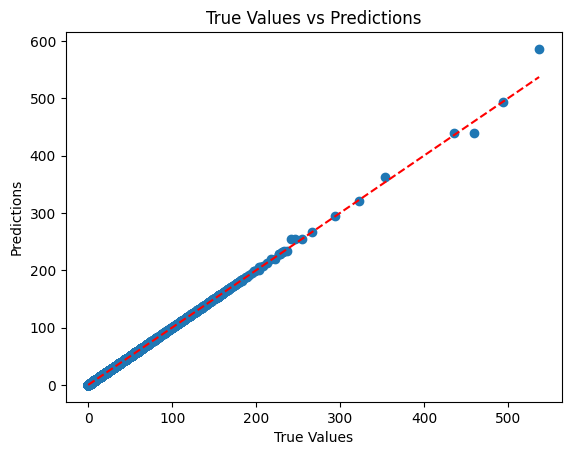

In [83]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Create and fit the DecisionTreeRegressor model
model = DecisionTreeRegressor()
model.fit(train_X, train_y)

# Get predicted prices on validation data
val_predictions = model.predict(test_X)

# Calculate mean absolute error
mae = mean_absolute_error(test_y, val_predictions)
print("Mean Absolute Error:", mae)

# Plot predicted vs true values
plt.scatter(test_y, val_predictions)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()


In [131]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val, multioutput='raw_values')
    return(mae)

In [132]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000, 50000000]:
    my_mae = get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, my_mae))

[23:26:45] WARNING: ../src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

Max leaf nodes: 5  		 Mean Absolute Error:  0.004850
[23:26:50] WARNING: ../src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

Max leaf nodes: 50  		 Mean Absolute Error:  0.004850
[23:26:53] WARNING: ../src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

Max leaf nodes: 500  		 Mean Absolute Error:  0.004850
[23:26:57] WARNING: ../src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

Max leaf nodes: 5000  		 Mean Absolute Error:  0.004850
[23:27:02] WARNING: ../src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

Max leaf nodes: 50000000  		 Mean Absolute Error:  0.004850


In [99]:
my_mae = get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y)
rounded_mae = round(my_mae, 4)  # Round MAE to 4 decimal places
print("Mean Absolute Error:", rounded_mae)


Mean Absolute Error: 0.0037


In [89]:
sample_input = pd.DataFrame({'Daily Mean PM2.5 Concentration': [5.1],
                             'DAY_OF_WEEK_Friday': [0],
                             'DAY_OF_WEEK_Monday': [0],
                             'DAY_OF_WEEK_Saturday': [0],
                             'DAY_OF_WEEK_Sunday': [0],
                             'DAY_OF_WEEK_Thursday': [1],
                             'DAY_OF_WEEK_Tuesday': [0],
                             'DAY_OF_WEEK_Wednesday': [0]})

# Extract the day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week = days_of_week[sample_input[['DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Tuesday', 'DAY_OF_WEEK_Wednesday', 'DAY_OF_WEEK_Thursday', 'DAY_OF_WEEK_Friday', 'DAY_OF_WEEK_Saturday', 'DAY_OF_WEEK_Sunday']].values.argmax()]

# Extract the daily PM2.5 concentration
pm25_concentration = sample_input['Daily Mean PM2.5 Concentration'].values[0]

# Print the day of the week and the daily PM2.5 concentration
print("Day of the Week:", day_of_week)
print("PM2.5 Concentration:", pm25_concentration)


# Predict the AQI values for the sample input data
predicted = model.predict(sample_input)
# rounded_predicted = np.round(predicted)

# Denormalize the predicted AQI values
#predicted_denormalized = scaler.inverse_transform(predicted)

# Print the denormalized predicted AQI values
print()
print('Predicted AQI:', predicted[0])


Day of the Week: Thursday
PM2.5 Concentration: 5.1

Predicted AQI: 21.0


In [91]:
sample_input

,Daily Mean PM2.5 Concentration,DAY_OF_WEEK_Friday,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday
0,5.1,0,0,0,0,1,0,0


In [123]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the train set
train_predictions = model.predict(train_X)

# Predict on the test set
test_predictions = model.predict(test_X)

# Calculate the Mean Squared Error (MSE) on train and test sets
train_mse = mean_squared_error(train_y, train_predictions)
test_mse = mean_squared_error(test_y, test_predictions)

# Calculate the Root Mean Squared Error (RMSE) on train and test sets
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Calculate the R-squared (R2) score on train and test sets
train_r2 = r2_score(train_y, train_predictions)
test_r2 = r2_score(test_y, test_predictions)

# Print the evaluation metrics
print("Train Set - MSE: {:.2f}, RMSE: {:.2f}, R2 Score: {:.2f}".format(train_mse, train_rmse, train_r2))
print("Test Set - MSE: {:.2f}, RMSE: {:.2f}, R2 Score: {:.2f}".format(test_mse, test_rmse, test_r2))


Train Set - MSE: 0.00, RMSE: 0.00, R2 Score: 1.00
Test Set - MSE: 0.10, RMSE: 0.32, R2 Score: 1.00


In [115]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [117]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(test_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error: 0.004849555372995069


In [121]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [129]:
sample_input = pd.DataFrame({'Daily Mean PM2.5 Concentration': [5.1],
                             'DAY_OF_WEEK_Friday': [0],
                             'DAY_OF_WEEK_Monday': [0],
                             'DAY_OF_WEEK_Saturday': [0],
                             'DAY_OF_WEEK_Sunday': [0],
                             'DAY_OF_WEEK_Thursday': [1],
                             'DAY_OF_WEEK_Tuesday': [0],
                             'DAY_OF_WEEK_Wednesday': [0]})

# Extract the day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week = days_of_week[sample_input[['DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Tuesday', 'DAY_OF_WEEK_Wednesday', 'DAY_OF_WEEK_Thursday', 'DAY_OF_WEEK_Friday', 'DAY_OF_WEEK_Saturday', 'DAY_OF_WEEK_Sunday']].values.argmax()]

# Extract the daily PM2.5 concentration
pm25_concentration = sample_input['Daily Mean PM2.5 Concentration'].values[0]

# Print the day of the week and the daily PM2.5 concentration
print("Day of the Week:", day_of_week)
print("PM2.5 Concentration:", pm25_concentration)


# Predict the AQI values for the sample input data
predicted = my_model.predict(sample_input)
# rounded_predicted = np.round(predicted)

# Denormalize the predicted AQI values
#predicted_denormalized = scaler.inverse_transform(predicted)

# Print the denormalized predicted AQI values
print()
print('Predicted AQI:', predicted[0])

Day of the Week: Thursday
PM2.5 Concentration: 5.1


NotFittedError: ignored